## 1. Reading images from file

shape: (512, 512, 3)
dtype: uint8
shape: (512, 512)
dtype: uint8


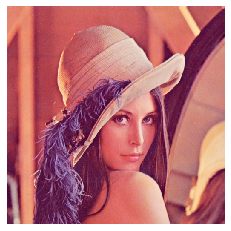

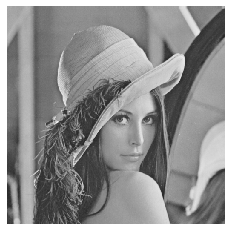

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv2.imread('./data/Lena.png')
print('shape:', img1.shape)
print('dtype:', img1.dtype)
cv2.imshow('lena1', img1)

img2 = cv2.imread('./data/Lena.png', cv2.IMREAD_GRAYSCALE)
print('shape:', img2.shape)
print('dtype:', img2.dtype)
cv2.imshow('lena2', img2)

cv2.waitKey()
cv2.destroyAllWindows()

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
#plt.tight_layout()
plt.imshow(img1)
plt.show()
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
#plt.tight_layout()
plt.imshow(img2)
plt.show()

## 2. Simple image transformations: resizing and flipping

original image shape: (512, 512, 3)
resized to 128x256 image shape: (256, 128, 3)
image shape: (256, 128, 3)
image shape: (2048, 1024, 3)


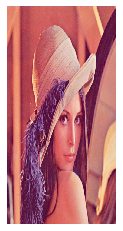

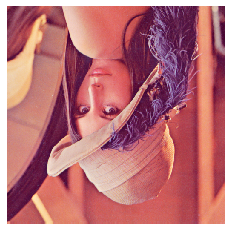

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/Lena.png')
print('original image shape:', img.shape)

width, height = 128, 256
resized_img = cv2.resize(img, (width, height))
print('resized to 128x256 image shape:', resized_img.shape)

w_mult, h_mult = 0.25, 0.5
resized_img = cv2.resize(img, (0, 0), resized_img, w_mult, h_mult)
print('image shape:', resized_img.shape)

w_mult, h_mult = 2, 4
resized_img = cv2.resize(img, (0, 0), resized_img, w_mult, h_mult, cv2.INTER_NEAREST)
print('image shape:', resized_img.shape)

img_flip_along_x = cv2.flip(img, 0)
img_flip_along_x_along_y = cv2.flip(img_flip_along_x, 1)
img_flipped_xy = cv2.flip(img, -1)

cv2.imshow('img1', img)
#cv2.imshow('img2', resized_img)
cv2.imshow('img3', img_flipped_xy)
cv2.waitKey()
cv2.destroyAllWindows()

img1 = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
#plt.tight_layout()
plt.imshow(img1)
plt.show()
img2 = cv2.cvtColor(img_flipped_xy, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
#plt.tight_layout()
plt.imshow(img2)
plt.show()

## 3. Saving image using lossy and lossless compression

In [3]:
import cv2 as cv

img = cv.imread('./data/Lena.png')

cv.imwrite('./data/Lena_compressed.png', img, [cv.IMWRITE_PNG_COMPRESSION, 0])

cv.imwrite('./data/Lena_compressed.jpg', img, [cv.IMWRITE_JPEG_QUALITY, 0])

True

## 4. Showing image in OpenCV window

In [4]:
import cv2 as cv

orig = cv.imread('./data/Lena.png')
orig_size = orig.shape[0:2]

cv.imshow("Original image", orig)
cv.waitKey(2000)
cv.destroyAllWindows()

## 5. Working with UI elements such as scrollbars in OpenCV window

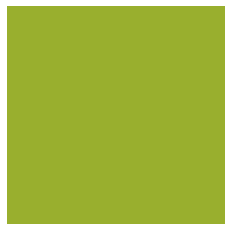

In [5]:
import cv2, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cv2.namedWindow('window')

fill_val = np.array([255, 255, 255], np.uint8)

def trackbar_callback(idx, value):
    fill_val[idx] = value
    
cv2.createTrackbar('R', 'window', 255, 255, lambda v: trackbar_callback(2, v))
cv2.createTrackbar('G', 'window', 255, 255, lambda v: trackbar_callback(1, v))
cv2.createTrackbar('B', 'window', 255, 255, lambda v: trackbar_callback(0, v))

while True:
    image = np.full((500, 500, 3), fill_val)
    cv2.imshow('window', image)
    key = cv2.waitKey(3)
    if key == 27: #ESC
        break

cv2.destroyAllWindows()

img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
#plt.tight_layout()
plt.imshow(img)
plt.show()

## 6. Drawing 2d primitives_ markers, lines, ellipses, rectangles and text

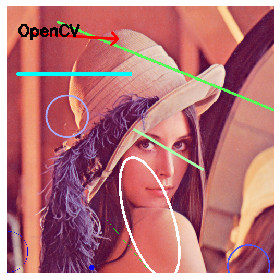

In [6]:
import cv2, random
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('./data/Lena.png')
w, h = image.shape[1], image.shape[0]

def rand_pt(mult=1.):
    return (random.randrange(int(w*mult)),
            random.randrange(int(h*mult)))

cv2.circle(image, rand_pt(), 40, (255, 0, 0))
cv2.circle(image, rand_pt(), 5, (255, 0, 0), cv2.FILLED)
cv2.circle(image, rand_pt(), 40, (255, 85, 85), 2)
cv2.circle(image, rand_pt(), 40, (255, 170, 170), 2, cv2.LINE_AA)
cv2.line(image, rand_pt(), rand_pt(), (0, 255, 0))
cv2.line(image, rand_pt(), rand_pt(), (85, 255, 85), 3)
cv2.line(image, rand_pt(), rand_pt(), (170, 255, 170), 3, cv2.LINE_AA)
cv2.arrowedLine(image, rand_pt(), rand_pt(), (0, 0, 255), 3, cv2.LINE_AA)
cv2.rectangle(image, rand_pt(), rand_pt(), (255, 255, 0), 3)
cv2.ellipse(image, rand_pt(), rand_pt(0.3), random.randrange(360), 0, 360, (255, 255, 255), 3)
cv2.putText(image, 'OpenCV', rand_pt(), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)

cv2.imshow("result", image)
cv2.waitKey()
cv2.destroyAllWindows()

img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(img)
plt.show()

## 7. Handling user input from keyboard

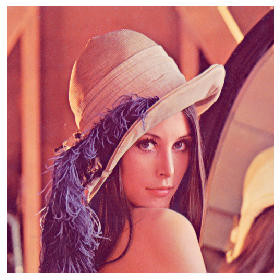

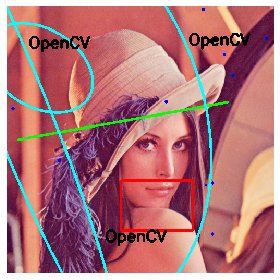

In [7]:
import cv2, numpy as np, random
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('./data/Lena.png')
image_to_show = np.copy(image)
w, h = image.shape[1], image.shape[0]

def rand_pt():
    return (random.randrange(w), random.randrange(h))

finish = False
while not finish:
    cv2.imshow("result", image_to_show)
    key = cv2.waitKey(0)
    if key == ord('p'): #point
        for pt in [rand_pt() for _ in range(10)]:
            cv2.circle(image_to_show, pt, 3, (255, 0, 0), -1)
    elif key == ord('l'): #line
        cv2.line(image_to_show, rand_pt(), rand_pt(), (0, 255, 0), 3)
    elif key == ord('r'): #rectangle
        cv2.rectangle(image_to_show, rand_pt(), rand_pt(), (0, 0, 255), 3)
    elif key == ord('e'): #ellipse
        cv2.ellipse(image_to_show, rand_pt(), rand_pt(), random.randrange(360), 0, 360, (255, 255, 0), 3)
    elif key == ord('t'): #text
        cv2.putText(image_to_show, 'OpenCV', rand_pt(), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)
    elif key == ord('c'): #reset
        image_to_show = np.copy(image)
    elif key == 27: #esc
        finish = True
        
cv2.destroyAllWindows()

img1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(img1)
plt.show()
img2 = cv2.cvtColor(image_to_show, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(img2)
plt.show()

## 8. Making your app interactive via handling user input from mouse

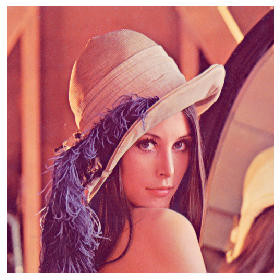

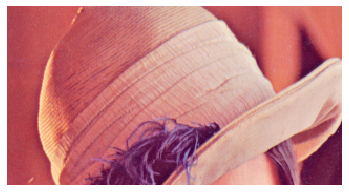

In [8]:
import cv2, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('./data/Lena.png')
image_to_show = np.copy(image)

mouse_pressed = False
s_x = s_y = e_x = e_y = -1

img1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(img1)
plt.show()

def mouse_callback(event, x, y, flags, param):
    global image_to_show, s_x, s_y, e_x, e_y, mouse_pressed

    if event == cv2.EVENT_LBUTTONDOWN:
        mouse_pressed = True
        s_x, s_y = x, y
        image_to_show = np.copy(image)

    elif event == cv2.EVENT_MOUSEMOVE:
        if mouse_pressed:
            image_to_show = np.copy(image)
            cv2.rectangle(image_to_show, (s_x, s_y),
                          (x, y), (0, 255, 0), 1)

    elif event == cv2.EVENT_LBUTTONUP:
        mouse_pressed = False
        e_x, e_y = x, y


cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback)

while True:
    cv2.imshow('image', image_to_show)
    k = cv2.waitKey(1)

    if k == ord('c'): #cut
        if s_y > e_y:
            s_y, e_y = e_y, s_y
        if s_x > e_x:
            s_x, e_x = e_x, s_x

        if e_y - s_y > 1 and e_x - s_x > 0:
            image = image[s_y:e_y, s_x:e_x]
            image_to_show = np.copy(image)
    elif k == 27: #esc
        break

cv2.destroyAllWindows()

img2 = cv2.cvtColor(image_to_show, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
#plt.tight_layout()
plt.imshow(img2)
plt.show()

## 9. Capturing and showing frames from camera

In [9]:
import cv2

capture = cv2.VideoCapture(0)

while True:
    has_frame, frame = capture.read()
    if not has_frame:
        print('Can\'t get frame')
        break
        
    cv2.imshow('frame', frame)
    key = cv2.waitKey(3)
    if key == 27:
        print('Pressed Esc')
        break

capture.release()
cv2.destroyAllWindows()

Can't get frame


## 10. Playing frame stream from video

In [10]:
import cv2

capture = cv2.VideoCapture('./data/drop.avi')

while True:
    has_frame, frame = capture.read()
    if not has_frame:
        print('Reached end of video')
        break

    cv2.imshow('frame', frame)
    key = cv2.waitKey(50)
    if key == 27:
        print('Pressed Esc')
        break
    
cv2.destroyAllWindows()

Reached end of video


## 11. Obtaining frame stream properties

In [11]:
import cv2

def print_capture_properties(*args):
    capture = cv2.VideoCapture(*args)
    print('Created capture:', ' '.join(map(str, args)))
    print('Frame count:', int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
    print('Frame width:', int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
    print('Frame height:', int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    print('Frame rate:', capture.get(cv2.CAP_PROP_FPS))
    
print_capture_properties('./data/drop.avi')
#print_capture_properties(0)

Created capture: ./data/drop.avi
Frame count: 182
Frame width: 256
Frame height: 240
Frame rate: 30.0


## 12. Writing frame stream into video

In [12]:
import cv2

capture = cv2.VideoCapture(0)
frame_width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('Frame width:', frame_width)
print('Frame height:', frame_height)

video = cv2.VideoWriter('./data/captured_video.avi', cv2.VideoWriter_fourcc(*'X264'),
                        25, (frame_width, frame_height))

while True:
    has_frame, frame = capture.read()
    if not has_frame:
        print('Can\'t get frame')
        break
        
    video.write(frame)
        
    cv2.imshow('frame', frame)
    key = cv2.waitKey(3)
    if key == 27:
        print('Pressed Esc')
        break            

capture.release()
video.release()
cv2.destroyAllWindows()

Frame width: 0
Frame height: 0
Can't get frame


## 13. Jumping between frames in video file

Frame count: 182
Position: 0
Position: 1
Position: 2
Position: 50
Position: 100


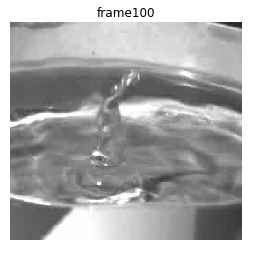

In [13]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

capture = cv2.VideoCapture('./data/drop.avi')
frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
print('Frame count:', frame_count)

print('Position:', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
_, frame = capture.read()
cv2.imshow('frame0', frame)

print('Position:', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
_, frame = capture.read()
cv2.imshow('frame1', frame)

print('Position:', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
_, frame = capture.read()
cv2.imshow('frame2', frame)

capture.set(cv2.CAP_PROP_POS_FRAMES, 50)
print('Position:', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
_, frame = capture.read()
cv2.imshow('frame50', frame)

capture.set(cv2.CAP_PROP_POS_FRAMES, 100)
print('Position:', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
_, frame = capture.read()
cv2.imshow('frame100', frame)
    
cv2.waitKey()
cv2.destroyAllWindows()

img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.axis('off')
#plt.xticks([])
plt.yticks([])
plt.title("frame100")
#plt.tight_layout()
plt.imshow(img)
plt.show()